In [1]:
# @author Sandipan Basu

# High Level GOAL for project - 
# We have medical costs of people characterized by certain attributes

# Hence 
# EDA using both graphical and non-graphical methods
# Hypothesis testing
# Answer questions with enough statistical proof

In [118]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 1. Get the dataset

In [3]:
insurancedf = pd.read_csv('insurance.csv')
insurancedf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurancedf.info()

# No of records - 1338
# No of columns = 7
# num type = 4
# object type = 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
insurancedf.nunique(dropna=False)

# sec, smoker has 2 distinct values - binary var
# region has 4 distinct values - categorical var

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [49]:
# use this for the 5-point summary
fivepointsummary = insurancedf.describe().transpose()
fivepointsummary

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
insurancedf.isnull().sum()

# No NA record or value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurancedf.isna().sum()

# No NA record or value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Observations from above instructions tells us following things - 
# 1. Nothing abnormal like negative values in any numerical cols
# 2. Binary Variables "Sex", "Smoker" has clean data
# 3. Category variable "Region" is clean 
# 4. zero null values - good
# 5. No missing values
# 7. Proper numerical variables are "Age", "BMI","Children", "Charges"

In [51]:
# 5-point summary of al numerical variables
fivepointsummary = fivepointsummary.iloc[:,2:]
fivepointsummary

# bmi, charges have high difference of median and std indicating possible outliers
# age on the other hand has very close std ~ median, possibility of outlier is low

,min,25%,50%,75%,max
age,18.0000,27.00000,39.000,51.000000,64.00000
bmi,15.9600,26.29625,30.400,34.693750,53.13000
children,0.0000,0.00000,1.000,2.000000,5.00000
charges,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a6da518>,
      dtype=object)

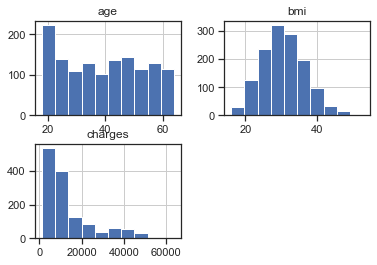

In [65]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
insurancedf.hist(column=['bmi','age','charges'])

# Charges clearly show is skewed and surely have outliers i.e few occurs of very high expenses
# Age is more of less distributed between just below 20 (18 actually) to 64. Highest number of people are in between 18-25
# BMI is so nicely distributed ! Averaging at 30. BMI needs heght and weight which we dont have but generally 30 is obese

In [69]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
insurancedf.skew(axis = 0)

# as was indicated age has very low skew ness from median, where as charges has very high right skew. BMI as well has failry high

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [91]:
# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

# Outlier = Mean +- 3*std
bmi_lowerwhisker = insurancedf['bmi'].mean() - 3 * insurancedf['bmi'].std()
bmi_upperwhisker = insurancedf['bmi'].mean() + 3 * insurancedf['bmi'].std()
print('BMI lower whisker', bmi_lowerwhisker)
print('BMI upper whisker', bmi_upperwhisker)
bmi_outliers = insurancedf[(insurancedf['bmi'] < bmi_lowerwhisker) | (insurancedf['bmi'] > bmi_upperwhisker)]
print('No of bmi_outliers', bmi_outliers.shape[0])
print(bmi_outliers)

print()
age_lowerwhisker = insurancedf['age'].mean() - 3 * insurancedf['age'].std()
age_upperwhisker = insurancedf['age'].mean() + 3 * insurancedf['age'].std()
print('Age lower whisker', age_lowerwhisker)
print('Age upper whisker', age_upperwhisker)
age_outliers = insurancedf[(insurancedf['age'] < age_lowerwhisker) | (insurancedf['age'] > age_upperwhisker)]
print('No of age_outliers',age_outliers.shape[0])
print(age_outliers)

print()
charges_lowerwhisker = insurancedf['charges'].mean() - 3 * insurancedf['charges'].std()
charges_upperwhisker = insurancedf['charges'].mean() + 3 * insurancedf['charges'].std()
print('charges lower whisker', charges_lowerwhisker)
print('charges upper whisker', charges_upperwhisker)
charges_outliers = insurancedf[(insurancedf['charges'] < charges_lowerwhisker) | (insurancedf['charges'] > charges_upperwhisker)]
print('No of charges_outliers',charges_outliers.shape[0])
print(charges_outliers)

# as we can see outliers detected in charges and bmi distribution but not on age.

BMI lower whisker 12.368836125949485
BMI upper whisker 48.95795759602359
No of bmi_outliers 4
      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627

Age lower whisker -2.9428557265872257
Age upper whisker 81.3569065487098
No of age_outliers 0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

charges lower whisker -23059.611444940725
charges upper whisker 49600.45597522324
No of charges_outliers 7
      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         

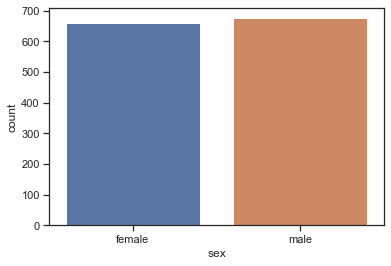

In [114]:
# Distribution of categorical columns (include children)
# counts plot of sex col with count
sns.countplot(x='sex',data=insurancedf)

# fairly similar distribution against count of records for sex column i,e similar amount of male and female samples

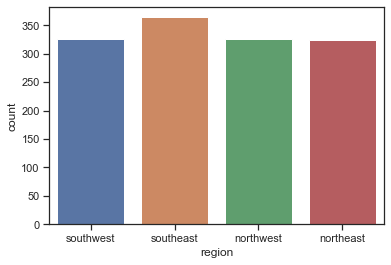

In [109]:
# counts plot of region col with count
sns.countplot(x='region',data=insurancedf)

# fairly similar distribution against count of records for region column 
# where 3 regions have exact number of records and southeast has more

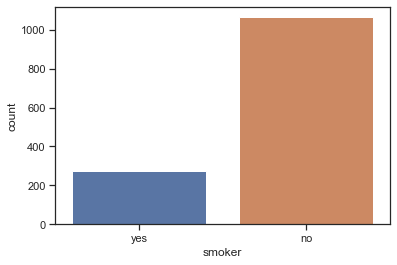

In [110]:
# counts plot of smoker col with count
sns.countplot(x='smoker',data=insurancedf)

# fairly dis-similar distribution against count of records for smoker
# we have many records who are non-smoker than smokers

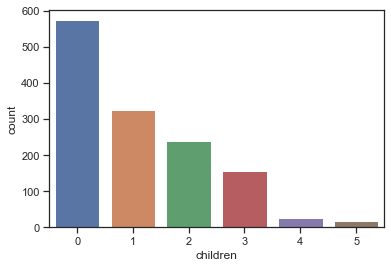

In [122]:
# counts plot of smoker col with count
sns.countplot(x='children',data=insurancedf)

# most patients have no children

In [119]:
# Pair plot of all columns
# We have to encode categorial features lets use Labelencoder for all 3 categorical variable

insurancedf_encoded = insurancedf.copy()

#sex
le = LabelEncoder()
le.fit(insurancedf_encoded.sex.drop_duplicates()) 
insurancedf_encoded.sex = le.transform(insurancedf_encoded.sex)
# smoker or not
le.fit(insurancedf_encoded.smoker.drop_duplicates()) 
insurancedf_encoded.smoker = le.transform(insurancedf_encoded.smoker)
#region
le.fit(insurancedf_encoded.region.drop_duplicates()) 
insurancedf_encoded.region = le.transform(insurancedf_encoded.region)

insurancedf_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


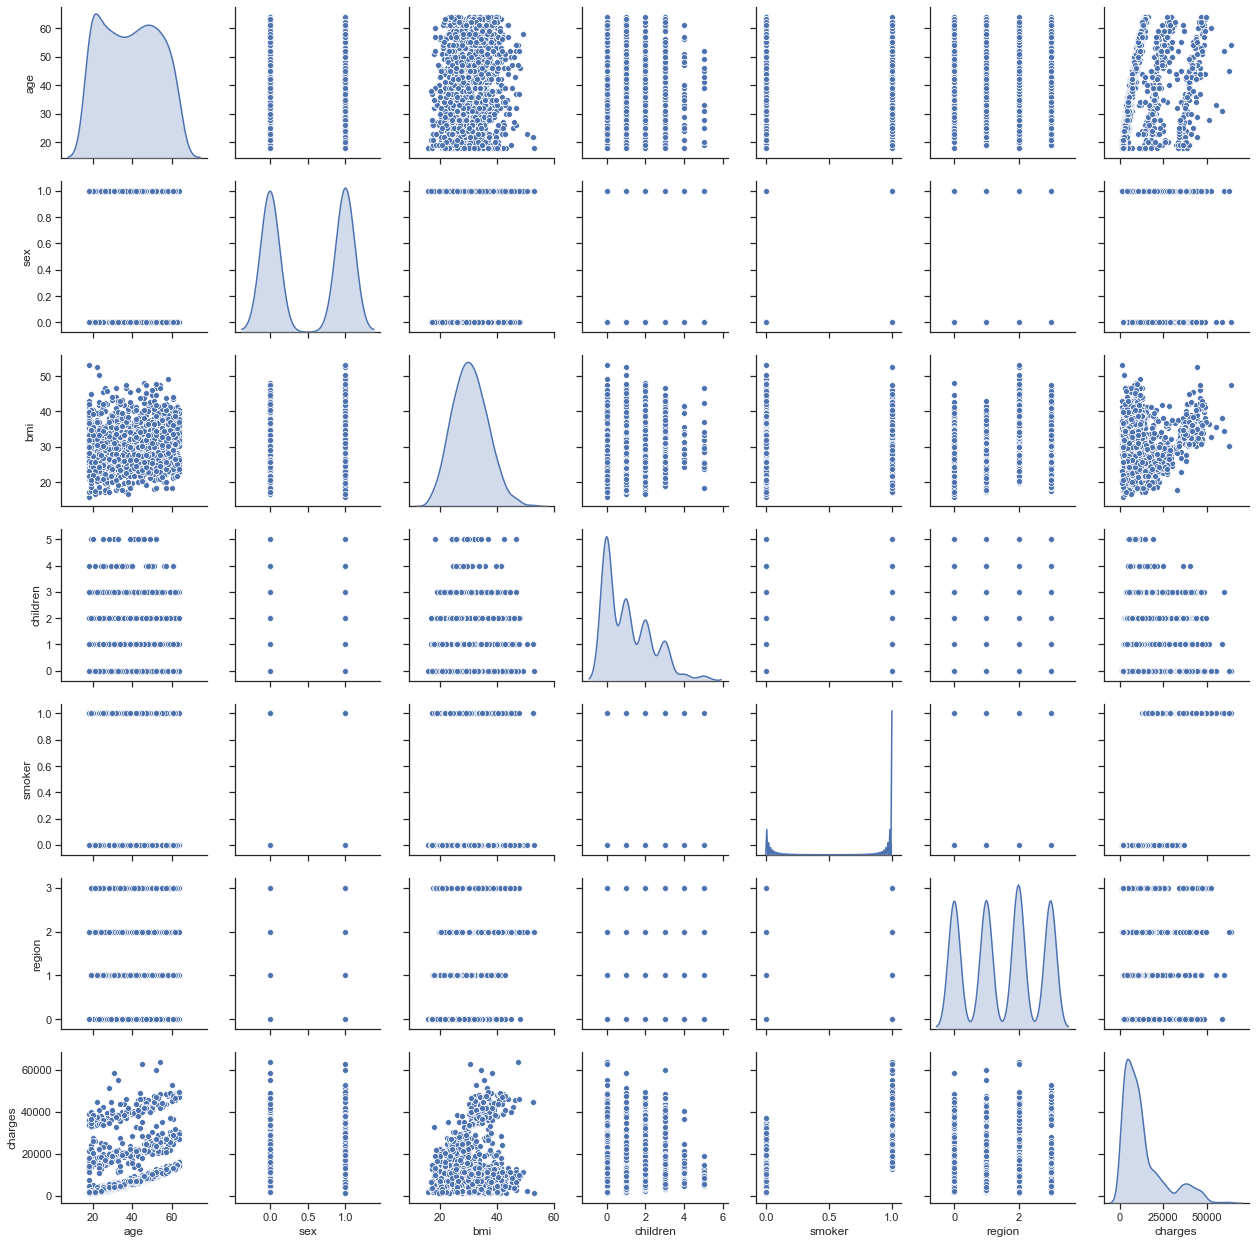

In [125]:
# Pair plot that includes all the columns of the data frame
sns.pairplot(data=insurancedf_encoded,diag_kind='kde')

# non-smoker are more 
# smokers pay more charges
# as age increses charges of treatment increases 
# increase in BMI also impacts charges infact people with BMI more than 30 pay more
# males pay more charges - probably a closer look at males with smokers will reveal more

In [159]:
# Do charges of people who smoke differ significantly from the people who don't?
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency 
from scipy.stats import f_oneway

df_charges_smoker = np.array(insurancedf_encoded[(insurancedf_encoded.smoker == 1)]["charges"])
df_charges_nonsmoker = np.array(insurancedf_encoded[(insurancedf_encoded.smoker == 0)]["charges"])

# Define null and alternatve hypothesis
# H0 => mu(df_charges_smoker) = mu(df_charges_nonsmoker) => mu(df_charges_smoker) - mu(df_charges_nonsmoker) = 0
H0 = 'Charges of smoker and non-smoker are same'
# HA => mu(df_charges_smoker) != mu(df_charges_nonsmoker)=> mu(df_charges_smoker) - mu(df_charges_nonsmoker) != 0
HA = 'Charges of smoker and non-smoker are not the same'
# Define significance level
# alpha = 0.05 i.e 5%

# Calculate p-value and test stats using 1 tsample of GPU1
t_statistic, p_value  =  ttest_ind(df_charges_smoker,df_charges_nonsmoker)
print('P Value ', p_value)
if(p_value < 0.05):
    print('Rejecting Null Hypothesis')
    print(HA) # reject null hypothesis
else:
    print('Accepting Null Hypothesis')
    print(H0)
# decision - p value is very less and it is less than 5% level of significance
# HENCE REJECT NULL HYPOTHESIS, HENCE THE DATA ARE SIGNIFICANTLY DIFFERENT


P Value  8.271435842177219e-283
Rejecting Null Hypothesis
Charges of smoker and non-smoker are not the same


P Value  0.08997637178984932
Accepting Null Hypothesis
BMI of male and female are same


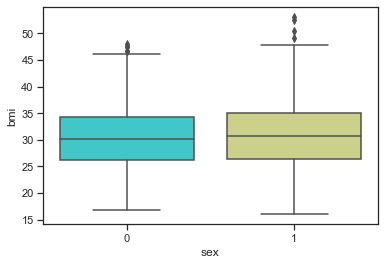

In [149]:
# Does bmi of males differ significantly from that of females
# box plot to hit home the point
sns.boxplot(x='sex',y='bmi',data=insurancedf_encoded,palette='rainbow')

# male bmi
bmi_m= np.array(insurancedf_encoded[(insurancedf_encoded.sex == 1)]["bmi"])
bmi_f= np.array(insurancedf_encoded[(insurancedf_encoded.sex == 0)]["bmi"])

# Define null and alternatve hypothesis
# H0 => mu(bmi_m) = mu(bmi_f) => mu(bmi_m) - mu(bmi_f) = 0
H0 = 'BMI of male and female are same'
# HA => mu(bmi_m) != mu(bmi_f)=> mu(bmi_m) - mu(bmi_f) != 0
HA = 'BMI of male and female are not the same'
# Define significance level
# alpha = 0.05 i.e 5%

# Calculate p-value and test stats using 1 tsample of GPU1
t_statistic, p_value  =  ttest_ind(bmi_m,bmi_f)
print('P Value ', p_value)
if(p_value < 0.05):
    print('Rejecting Null Hypothesis')
    print(HA) # reject null hypothesis
else:
    print('Accepting Null Hypothesis')
    print(H0)

# as can be see male and feamle bmi iqr are same and hence has very little difference.
# box plot visually states this as well 

In [163]:
# Is the proportion of smokers significantly different in different genders? 

# use chi square 

# Define null and alternatve hypothesis
H0 = "Proportion of Gender is same for smokers"   
HA = "Proportion of Gender is NOT same for smokers"

df = pd.crosstab(insurancedf_encoded['sex'],insurancedf_encoded['smoker'])
print(df)

chi_sq_Stat, p_value, deg_freedom, exp_freq = chi2_contingency(df)

print('p value ', p_value)
print('contegency table ', exp_freq)

print('P Value ', p_value)
if(p_value < 0.05):
    print('Rejecting Null Hypothesis')
    print(HA) # reject null hypothesis
else:
    print('Accepting Null Hypothesis')
    print(H0)
    
# as can can see Male = 1, Female = 0 and the proportion are significantly different

smoker    0    1
sex             
0       547  115
1       517  159
p value  0.006548143503580696
contegency table  [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
P Value  0.006548143503580696
Rejecting Null Hypothesis
Proportion of Gender is NOT same for smokers


In [162]:
# Is the distribution of bmi across women with no children, one child and two children, the same 

# basically if number of children has any effect on bmi distribution in women OR in other words distribution of 
# bmi in women having diff no of kids, are signifactly different

# We will use one-way ANOVA tests - the null hypothesis that two or more groups have the same population mean. 
# The test is applied to samples from two or more groups, possibly with differing sizes.

# Define null and alternatve hypothesis
H0 = "Number of children has NO effect on bmi distribution in women having diff no of kids"   
HA = "Number of children has significant effect on bmi distribution in women having diff no of kids"


bmi_female_zero = insurancedf_encoded[insurancedf_encoded.children == 0]['bmi']
bmi_female_one = insurancedf_encoded[insurancedf_encoded.children == 1]['bmi']
bmi_female_two = insurancedf_encoded[insurancedf_encoded.children == 2]['bmi']

f_stat, p_value = f_oneway(bmi_female_zero,bmi_female_one,bmi_female_two)

print('p value ', p_value)
if(p_value < 0.05):
    print('Rejecting Null Hypothesis')
    print(HA) # reject null hypothesis
else:
    print('Accepting Null Hypothesis')
    print(H0)
    
# Number of children has NO effect on bmi distribution in women having diff no of kids

p value  0.6591330886467935
Accepting Null Hypothesis
Number of children has NO effect on bmi distribution in women having diff no of kids
